# DX 704 Week 1 Project

This week's project will build a portfolio risk and return model, and make investing recommendations for hypothetical clients.
You will collect historical data, estimate returns and risks, construct efficient frontier portfolios, and sanity check the certainty of the maximum return portfolio.

The full project description and a template notebook are available on GitHub at the following link.

https://github.com/bu-cds-dx704/dx704-project-01


Feel free to use optimization tools or libraries (such as CVXOPT or scipy.optimize) to perform any calculations required for this mini project.

### Example Code

You may find it helpful to refer to these GitHub repositories of Jupyter notebooks for example code.

* https://github.com/bu-cds-omds/dx601-examples
* https://github.com/bu-cds-omds/dx602-examples
* https://github.com/bu-cds-omds/dx603-examples
* https://github.com/bu-cds-omds/dx704-examples

Any calculations demonstrated in code examples or videos may be found in these notebooks, and you are allowed to copy this example code in your homework answers.

## Part 1: Collect Data

Collect historical monthly price data for the last 24 months covering 6 different stocks.
The data should cover 24 consecutive months including the last month that ended before this week's material was released on Blackboard.
To be clear, if a month ends between the Blackboard release and submitting your project, you do not need to add that month.

The six different stocks must include AAPL, SPY and TSLA.
At least one of the remaining 3 tickers must start with the same letter as your last name (e.g. professor Considine could use COIN).
This is to encourage diversity in what stocks you analyze; if you discuss this project with classmates, please make sure that you pick different tickers to differentiate your work.
Do not pick stocks with fewer than 24 consecutive months of price data.

In [33]:
# YOUR CHANGES HERE

# Data was collected from the Nasdaq website and compiled manually in csv format.

import pandas as pd

# Read in TSV file
historical_data = pd.read_csv("historical_data.tsv", sep="\t", header=0)

In [34]:
historical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    24 non-null     object 
 1   SPY     24 non-null     float64
 2   TSLA    24 non-null     float64
 3   NFLX    24 non-null     float64
 4   AAPL    24 non-null     float64
 5   T       24 non-null     float64
 6   META    24 non-null     float64
dtypes: float64(6), object(1)
memory usage: 1.4+ KB


In [35]:
historical_data.head()

,date,SPY,TSLA,NFLX,AAPL,T,META
0,8/29/25,645.05,333.87,1208.25,232.14,29.29,738.70
1,7/31/25,632.08,308.27,1159.40,207.57,27.41,773.44
2,6/30/25,617.85,317.66,1339.13,205.17,28.94,738.09
3,5/30/25,589.39,346.46,1207.23,200.85,27.80,647.49
4,4/30/25,554.54,282.16,1131.72,212.50,27.70,549.00


Save the data as a TSV file named "historical_prices.tsv" and include a header row with the column names "date" and the 6 stock ticker symbols.
The date should be the last trading day of the month, so it may not be the last day of the month.
For example, the last trading day of November 2024 was 2024-11-29.
The remaining columns should contain the adjusted closing prices of the corresponding stock tickers on that day.


In [36]:
# YOUR CHANGES HERE

historical_data.to_csv("historical_prices.tsv", sep="\t", index=False, header=1)


Submit "historical_prices.tsv" in Gradescope.

## Part 2: Calculate Historical Asset Returns

Calculate the historical asset returns based on the price data that you previously collected.

In [37]:
# YOUR CHANGES HERE

# Load some relevant packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Read in the TSV created above
historical_prices = pd.read_csv("historical_prices.tsv", sep="\t")
historical_prices["date"] = pd.to_datetime(historical_prices["date"])
historical_prices = historical_prices.set_index("date")
historical_prices


/tmp/ipykernel_1941/2217914790.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  historical_prices["date"] = pd.to_datetime(historical_prices["date"])


,SPY,TSLA,NFLX,AAPL,T,META
date,,,,,,
2025-08-29,645.05,333.87,1208.25,232.14,29.29,738.70
2025-07-31,632.08,308.27,1159.40,207.57,27.41,773.44
2025-06-30,617.85,317.66,1339.13,205.17,28.94,738.09
2025-05-30,589.39,346.46,1207.23,200.85,27.80,647.49
2025-04-30,554.54,282.16,1131.72,212.50,27.70,549.00
2025-03-31,559.39,259.16,932.53,222.13,28.28,576.36
2025-02-28,594.18,292.98,980.56,241.84,27.41,668.20
2025-01-31,601.82,404.60,976.76,236.00,23.73,689.18
2024-12-31,586.08,403.84,891.32,250.42,22.77,585.51


In [38]:
print("Earliest date:", historical_prices.index.min())
print("Latest date  :", historical_prices.index.max())
print("Shape        :", historical_prices.shape)

Earliest date: 2023-09-29 00:00:00
Latest date  : 2025-08-29 00:00:00
Shape        : (24, 6)


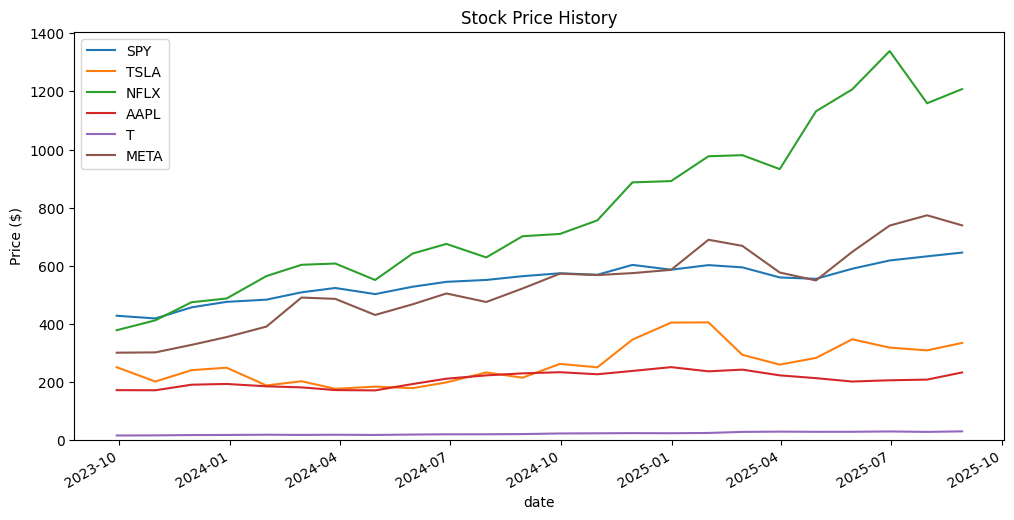

In [39]:
# Visualization of the data for context
historical_prices.sort_index().plot(figsize=(12,6))
plt.ylim(0)
plt.title("Stock Price History")
plt.ylabel("Price ($)")
plt.show()

Save the data as a TSV file named "historical_returns.tsv" and include a header row with the column names "date" and the 6 stock ticker symbols.
Each row should have the date at the end of the month and the corresponding *relative* price changes.
For example, if the previous price was \$100 and the new price is \$110, the return value should be 0.10.
There should only be 23 rows of data in this file, since they are computed as the differences of 24 prices.

In [40]:
# YOUR CHANGES HERE
historical_prices = historical_prices.sort_index()

historical_returns = historical_prices.pct_change().dropna()
historical_returns

,SPY,TSLA,NFLX,AAPL,T,META
date,,,,,,
2023-10-31,-0.021709,-0.197346,0.090281,-0.002570,0.025300,0.003531
2023-11-30,0.091344,0.195379,0.151279,0.112315,0.075974,0.085903
2023-12-29,0.041433,0.034988,0.027238,0.013583,0.012674,0.081950
2024-01-31,0.015926,-0.246257,0.158622,-0.042227,0.054231,0.102215
2024-02-29,0.052187,0.077901,0.068799,-0.019794,-0.042962,0.256293
2024-03-28,0.029503,-0.129235,0.007314,-0.051286,0.039575,-0.009283
2024-04-30,-0.040320,0.042608,-0.093343,-0.006706,-0.040341,-0.114111
2024-05-31,0.050580,-0.028372,0.165226,0.128691,0.078745,0.085222
2024-06-28,0.031951,0.111186,0.051838,0.095553,0.048847,0.080093


In [41]:
historical_returns.reset_index().to_csv("historical_returns.tsv", sep="\t", index=False)

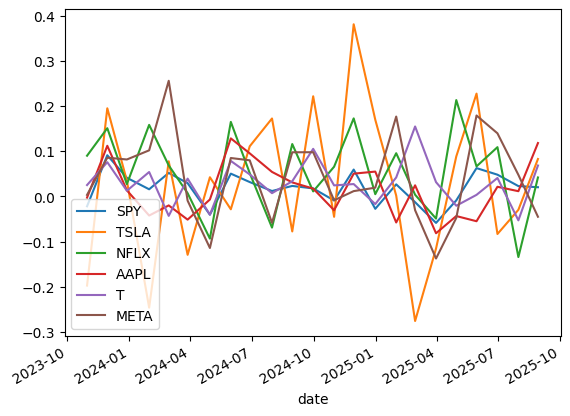

In [42]:
# Visualize for fun
historical_returns.plot();

Submit "historical_returns.tsv" in Gradescope.

## Part 3: Estimate Returns

Estimate the expected returns for each asset using the previously calculated return data.
Just compute the average (mean) return for each asset over your data set; do not use other estimators that have been mentioned.
This will serve as your estimate of expected return for each asset.

In [43]:
# YOUR CHANGES HERE

estimated_returns = historical_returns.mean()
estimated_returns

SPY     0.018663
TSLA    0.025313
NFLX    0.055567
AAPL    0.014997
T       0.030551
META    0.044190
dtype: float64

Save the estimated returns in a TSV file named "estimated_returns.tsv" and include a header row with the column names "asset" and "estimated_return".

In [44]:
# YOUR CHANGES HERE

estimated_returns = estimated_returns.reset_index()
estimated_returns.columns = ["asset", "estimated_return"]

estimated_returns.to_csv("estimated_returns.tsv", sep="\t", index=False)

Submit "estimated_returns.tsv" in Gradescope.

## Part 4: Estimate Risk

Estimate the covariance matrix for the asset returns to understand how the assets move together.

In [45]:
# YOUR CHANGES HERE

estimated_covariances = historical_returns.cov()
estimated_covariances

,SPY,TSLA,NFLX,AAPL,T,META
SPY,0.001299,0.002412,0.001441,0.000823,0.000240,0.002445
TSLA,0.002412,0.026703,0.001163,0.003231,-0.001943,0.002167
NFLX,0.001441,0.001163,0.007977,0.000676,0.001120,0.003282
AAPL,0.000823,0.003231,0.000676,0.003591,0.000937,0.000011
T,0.000240,-0.001943,0.001120,0.000937,0.002368,-0.000039
META,0.002445,0.002167,0.003282,0.000011,-0.000039,0.009309


Save the estimated covariances to a TSV file named "estimated_covariance.tsv".
The header row should have a blank column name followed by the names of the assets.
Each data row should start with the name of an asset for that row, and be followed by the individual covariances corresponding to that row and column's assets.
(This is the format of pandas's `to_csv` method with `sep="\t"` when used on a covariance matrix as computed in the examples.)

In [46]:
# YOUR CHANGES HERE

estimated_covariances.to_csv("estimated_covariances.tsv", sep="\t", index=True)

Submit "estimated_covariance.tsv" in Gradescope.

## Part 5: Construct the Maximum Return Portfolio

Compute the maximum return portfolio based on your previously estimated risks and returns.

In [47]:
#!pip install cvxpy

In [48]:
estimated_returns

,asset,estimated_return
0,SPY,0.018663
1,TSLA,0.025313
2,NFLX,0.055567
3,AAPL,0.014997
4,T,0.030551
5,META,0.044190


In [49]:
# YOUR CHANGES HERE

import cvxpy as cp

# rerun so that we have the correct formatting
estimated_returns = historical_returns.mean()

# number of assets
n = len(estimated_returns)

# create variables to optimize
x = cp.Variable(n)

In [50]:
objective = cp.Maximize(estimated_returns.to_numpy().reshape(1, -1) @ x)
objective

Maximize(Expression(AFFINE, UNKNOWN, (1,)))

In [51]:
# formulate linear program
prob = cp.Problem(objective,
                  [0 <= x,
                   cp.sum(x) == 1])

In [52]:
estimated_return_P = prob.solve()
estimated_return_P

0.05556696178166159

In [53]:
x.value

array([2.44351699e-09, 2.92651576e-09, 9.99999989e-01, 2.21835772e-09,
       3.32447234e-09, 4.13628570e-10])

In [54]:
estimated_returns

SPY     0.018663
TSLA    0.025313
NFLX    0.055567
AAPL    0.014997
T       0.030551
META    0.044190
dtype: float64

In [55]:
# We can see here that the maximum expected return portfolio is all in on Netflix (NFLX)

Save the maximum return portfolio in a TSV file named "maximum_return.tsv".
The header row should have two columns, "asset" and "allocation".
The allocation values should sum up to one.


In [56]:
# YOUR CHANGES HERE

maximum_return = pd.DataFrame({
    "asset": estimated_returns.index,
    "allocation": x.value
})

maximum_return.to_csv("maximum_return.tsv", sep="\t", index=False)

Submit "maximum_return.tsv" in Gradescope.

## Part 6: Construct the Minimum Risk Portfolio

Compute the minimum risk portfolio based on your previously estimated risks.

In [59]:
# YOUR CHANGES HERE

# create variables for minimum risk optimization
x_minimum_risk = cp.Variable(n)

objective_minimum_risk = cp.Minimize(x_minimum_risk.T @ estimated_covariances.to_numpy() @ x_minimum_risk)
objective_minimum_risk

Minimize(Expression(CONVEX, NONNEGATIVE, ()))

In [60]:
# formulate minimum risk program
prob_minimum_risk = cp.Problem(objective_minimum_risk,
                               [0 <= x_minimum_risk,
                                cp.sum(x_minimum_risk) == 1])

covariance_minimum_risk = prob_minimum_risk.solve()
covariance_minimum_risk

np.float64(0.0009447505866733325)

In [63]:
x_minimum_risk.value.round(2)

array([ 0.65, -0.  , -0.  ,  0.03,  0.32, -0.  ])

Save the minimum risk portfolio in a TSV file named "minimum_risk.tsv".
The header row should have two columns, "asset" and "allocation".
The allocation values should sum up to one.


In [62]:
# YOUR CHANGES HERE

minimum_risk = pd.DataFrame({
    "asset": estimated_covariances.columns,
    "allocation": x_minimum_risk.value
})

minimum_risk.to_csv("minimum_risk.tsv", sep="\t", index=False)

Submit "minimum_risk.tsv" in Gradescope.

## Part 7: Build Efficient Frontier Portfolios

Compute 101 portfolios along the mean-variance efficient frontier with evenly spaced estimated returns.
The first portfolio should be the minimum risk portfolio from part 4, and the last portfolio should be the maximum return portfolio from part 3.
The estimated return of each portfolio should be higher than the previous by one percent of the difference between the first and last portfolios.
That is, the estimated return of the portfolios should be similar to `np.linspace(min_risk_return, max_return, 101)`.


In [65]:
# YOUR CHANGES HERE

# minimum risk portfolio

n = len(estimated_returns)

x_minimum_risk = cp.Variable(n)

objective_minimum_risk = cp.Minimize(x_minimum_risk.T @ estimated_covariances.to_numpy() @ x_minimum_risk)
objective_minimum_risk

prob_minimum_risk = cp.Problem(objective_minimum_risk,
                               [0 <= x_minimum_risk,
                                cp.sum(x_minimum_risk) == 1])

covariance_minimum_risk = prob_minimum_risk.solve()
covariance_minimum_risk

estimated_return_minimum_risk = x_minimum_risk.value.T @ estimated_returns
estimated_return_minimum_risk

np.float64(0.022367057836052577)

In [67]:
estimated_return_maximum_return = max(estimated_returns)
estimated_return_maximum_return

0.055566962138243504

In [85]:
ef_variances = []
ef_returns = []
ef_portfolios = []

for r in np.linspace(estimated_return_minimum_risk, max(estimated_returns), 101):
    # create variables to optimize
    x_r = cp.Variable(n)

    # formulate linear program
    prob_r = cp.Problem(cp.Minimize(x_r.T @ estimated_covariances.to_numpy() @ x_r),
                        [0 <= x_r,
                         cp.sum(x_r) == 1,
                         x_r.T @ estimated_returns == r])
    ef_variances.append(prob_r.solve())
    ef_returns.append(r)
    ef_portfolios.append(x_r.value)

ef_portfolios = np.asarray(ef_portfolios)

/home/codespace/.local/lib/python3.12/site-packages/pandas/core/internals/blocks.py:395: RuntimeWarning: invalid value encountered in sqrt
  result = func(self.values, **kwargs)


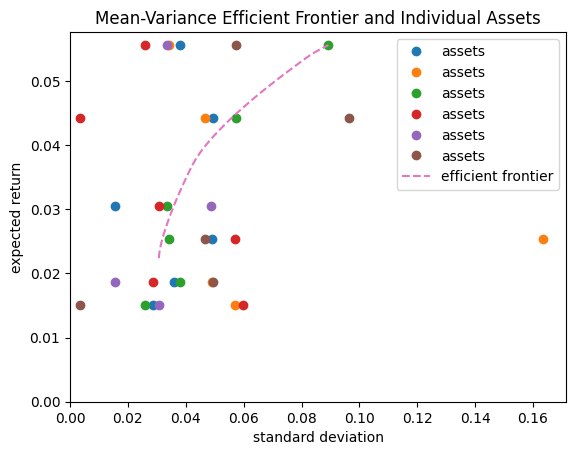

In [78]:
# visualization for fun
plt.plot(np.sqrt(estimated_covariances), estimated_returns, label="assets", linestyle="none", marker="o")
plt.plot(np.sqrt(ef_variances), ef_returns, label="efficient frontier", linestyle="--")

plt.legend()
plt.title("Mean-Variance Efficient Frontier and Individual Assets")
plt.xlabel("standard deviation")
plt.xlim(0)
plt.ylabel("expected return")
plt.ylim(0)

plt.show();

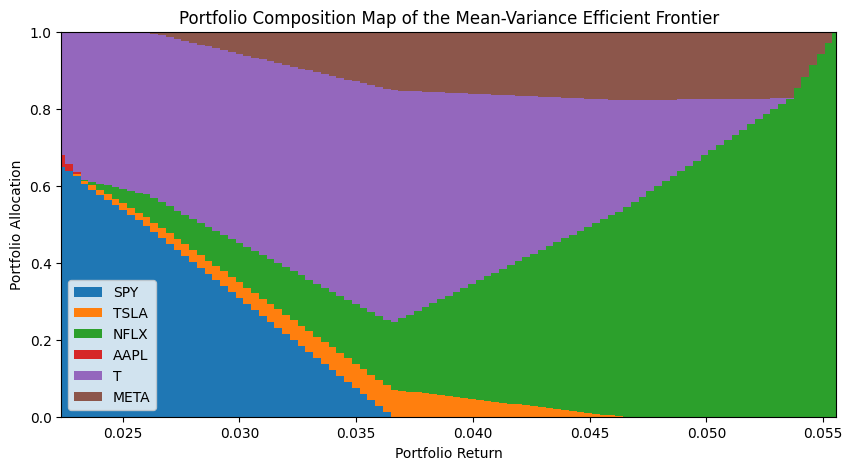

In [79]:
plt.figure(figsize=(10, 5))

bottom = np.zeros(ef_portfolios.shape[0])
for (i, a) in enumerate(historical_returns.columns):
    plt.bar(x=ef_returns,
            height=ef_portfolios[:,i],
            bottom=bottom,
            label=a,
            width=(ef_returns[1] - ef_returns[0]))
    bottom += ef_portfolios[:,i]

plt.legend()
plt.xlabel("Portfolio Return")
plt.xlim(min(ef_returns), max(ef_returns))
plt.ylabel("Portfolio Allocation")
plt.ylim(0, 1)
plt.title("Portfolio Composition Map of the Mean-Variance Efficient Frontier")

plt.show();


In [82]:
historical_returns.columns

Index(['SPY', 'TSLA', 'NFLX', 'AAPL', 'T', 'META'], dtype='object')

In [86]:
assets = ["SPY", "TSLA", "NFLX", "AAPL", "T", "META"]
ef_portfolios = pd.DataFrame(ef_portfolios, columns=assets)
ef_portfolios.head()

,SPY,TSLA,NFLX,AAPL,T,META
0,0.648225,-2.797896e-20,-2.007991e-20,3.073596e-02,0.321039,-6.777756e-20
1,0.637845,1.235668e-03,-9.226487e-21,1.690843e-02,0.344010,-6.369199e-20
2,0.624988,5.890870e-03,-9.098756e-21,3.823166e-03,0.365298,-6.281108e-20
3,0.603369,1.010141e-02,1.502238e-03,-6.346161e-22,0.385027,-4.426278e-21
4,0.590013,1.156820e-02,8.733668e-03,-5.693601e-22,0.389686,-3.887690e-21


In [87]:
ef_portfolios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SPY     101 non-null    float64
 1   TSLA    101 non-null    float64
 2   NFLX    101 non-null    float64
 3   AAPL    101 non-null    float64
 4   T       101 non-null    float64
 5   META    101 non-null    float64
dtypes: float64(6)
memory usage: 4.9 KB


Save the portfolios in a TSV file named "efficient_frontier.tsv".
The header row should have columns "index", "return", "risk", and all the asset tickers.
Each data row should have the portfolio index (0-100), the estimated return of the portfolio, the estimated standard deviation (not variance) of the portfolio, and all the asset allocations (which should sum to one).

In [88]:
# YOUR CHANGES HERE

# Check rows weights sum to 1
ef_portfolios = ef_portfolios.div(ef_portfolios.sum(axis=1), axis=0)

# Convert variance -> standard deviation
ef_risk = np.sqrt(np.asarray(ef_variances, dtype=float))

# Build the index column
ef_index = np.arange(len(ef_returns), dtype=int)

# Assemble
out = pd.concat(
    [
        pd.DataFrame({
            "index": ef_index,
            "return": np.asarray(ef_returns, dtype=float),
            "risk":   ef_risk
        }),
        ef_portfolios.reset_index(drop=True)
    ],
    axis=1
)

# Save as TSV
out.to_csv("efficient_frontier.tsv", sep="\t", index=False)

Submit "efficient_frontier.tsv" in Gradescope.

## Part 8: Check Maximum Return Portfolio Stability

Check the stability of the maximum return portfolio by resampling the estimated risk/return model.

Repeat 1000 times -
1. Use `np.random.multivariate_normal` to generate 23 return samples using your previously estimated risks and returns.
2. Estimate the return of each asset using that resampled return history.
3. Check which asset had the highest return in those resampled estimates.

This procedure is a reduced and simplified version of the Michaud resampled efficient frontier procedure that takes uncertainty in the risk model into account.

In [90]:
# YOUR CHANGES HERE

# Align and coerce
assets = list(estimated_covariances.columns)
mu = estimated_returns.reindex(assets).astype(float).to_numpy()
Sigma = estimated_covariances.reindex(index=assets, columns=assets).astype(float).to_numpy()

# Ensure covariance is positive semi-definite (add tiny jitter if needed)
min_eig = np.linalg.eigvalsh(Sigma).min()
if min_eig < 0:
    Sigma = Sigma + (-min_eig + 1e-12) * np.eye(len(assets))

# Parameters
n_trials = 1000
n_samples_per_trial = 23
rng = np.random.default_rng(42)  # reproducible

wins = np.zeros(len(assets), dtype=int)

for _ in range(n_trials):
    # 1) simulate a 23-period return history from N(mu, Sigma)
    samples = rng.multivariate_normal(mean=mu, cov=Sigma, size=n_samples_per_trial)
    # 2) estimate mean return per asset from the simulated history
    mean_est = samples.mean(axis=0)
    # 3) count which asset is the max
    wins[np.argmax(mean_est)] += 1

stability = pd.DataFrame({
    "asset": assets,
    "probability": wins / n_trials
}).sort_values("probability", ascending=False).reset_index(drop=True)

stability


,asset,probability
0,NFLX,0.544
1,META,0.230
2,TSLA,0.180
3,T,0.043
4,AAPL,0.003
5,SPY,0.000


Save a file "max_return_probabilities.tsv" with the distribution of highest return assets.
The header row should have columns "asset" and "probability".
There should be a data row for each asset and its sample probability of having the highest return based on those 1000 resampled estimates.


In [91]:
# YOUR CHANGES HERE

# Save as TSV
stability.to_csv("max_return_probabilities.tsv", sep="\t", index=False)

Submit "max_return_probabilities.tsv" in Gradescope.

## Part 9: Acknowledgments

Make a file "acknowledgments.txt" documenting any outside sources or help on this project.
If you discussed this assignment with anyone, please acknowledge them here.
If you used any libraries not mentioned in this module's content, please list them with a brief explanation what you used them for.
If you used any generative AI tools, please add links to your transcripts below, and any other information that you feel is necessary to comply with the generative AI policy.
If no acknowledgements are appropriate, just write none in the file.


Submit "acknowledgements.txt" in Gradescope.

## Part 10: Code

Please submit a Jupyter notebook that can reproduce all your calculations and recreate the previously submitted files.
You do not need to provide code for data collection if you did that by manually.

Submit "project.ipynb" in Gradescope.